In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('funda-amsterdam.csv')
df.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


In [8]:
df = df[df['price'] > 30000]
df.rename(columns={'Unnamed: 0':'id'}, inplace=True)

In [4]:
df_subset = df[['price', 'year_built', 'rooms', 'area']]

In [5]:
df_subset.head()

,price,year_built,rooms,area
0,510000,1906,3,108
1,215000,1938,2,47
2,325000,2003,3,116
3,315000,1910,3,58
4,200000,1906,3,63


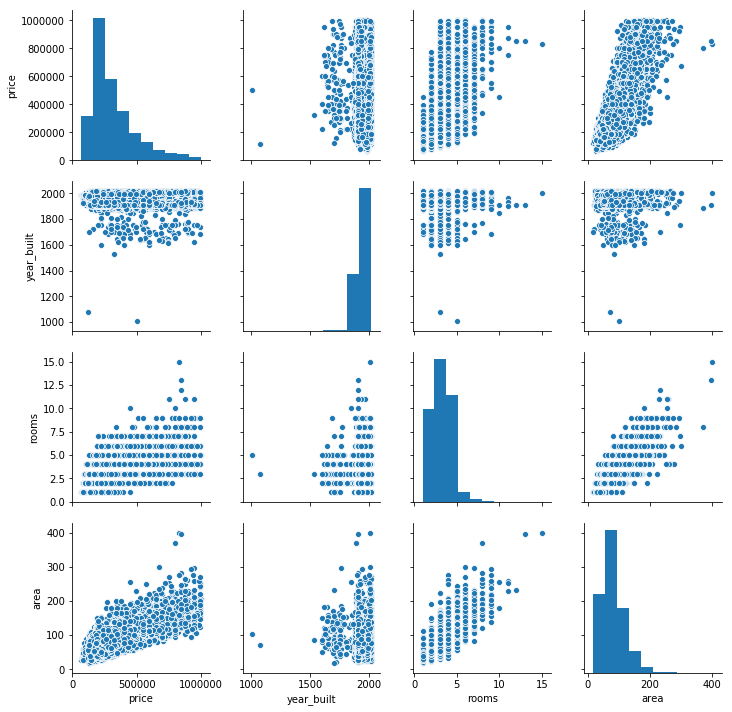

In [6]:
sns.pairplot(df_subset)
plt.show()

In [9]:
y = df_subset['price'] 
X = df_subset.loc[:,'year_built':'rooms']
X.index = df['id']
X.head()

,year_built,rooms
id,,
0,1906,3
1,1938,2
2,2003,3
3,1910,3
4,1906,3


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.head()

,year_built,rooms
id,,
3116,1986,3
9495,1906,5
9147,2016,4
2601,2014,1
10502,1991,3


In [11]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [12]:
coef = pd.DataFrame(X.columns.values, lm.coef_)
coef

,0
-788.775583,year_built
83087.074089,rooms


In [13]:
y_p = lm.predict(X_test)
r2_score(y_test, y_p)

0.3575446383116272

In [14]:
math.sqrt(mean_squared_error(y_test, y_p))


138038.23419344478

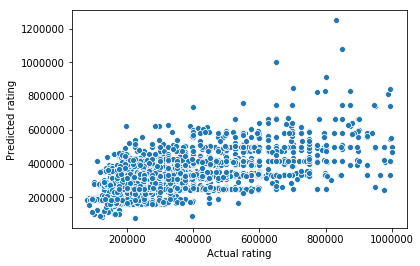

In [15]:
sns.scatterplot(y_test, y_p)
plt.xlabel('Actual rating')
plt.ylabel('Predicted rating')
plt.show()